# Cylinder under pression loading: `le problème du chaudronnier`

Let us consider a linear elastic cylinder with an internal radius $R_{\mathrm{in}}=R-t/2$ and external radius  $R_{\mathrm{out}}=R+t/2$, where $R$ is the average radius and $t$ the thickness. The cylinder is sumbitted to an internal pressure $p_{\mathrm{in}}$ and an external pressure $p_{\mathrm{out}}$. We will denote by $E$ and $\nu$ its Young modulus and Poisson ratio. We consider a 2D model for the cylinder modelling only its cross-section under plane-strain assumption

1. Give a variational formulation of the problem 
2. Write the problem formulation in a dimensionless form


**Homework 1** (it will be required in the *CR1*): 

Show that the analytical solution of the problem is ($\mathbf{u}=u(r)\,\mathbf{e}_r$), with

\begin{equation}
u(r)=Ar+\frac Br, \quad
A = \frac{p}{2\mu}\bigl(1-2\nu\bigr)\Bigl[\frac{\varpi}{2\rho}\bigl(1+\dfrac{\rho^2}{4}\bigr)-1\Bigr]
\quad\text{and}\quad
B = \frac{p\varpi R^2}{4\rho\mu}\bigl(1-\dfrac{\rho^2}{4}\bigl)^2,
\end{equation}

where we have introduced

\begin{equation}
\rho=\frac{t}{R},\quad
p = \frac{p_\mathrm{in}+p_\mathrm{out}}{2}
\quad\text{and}\quad
\varpi = \frac{p_\mathrm{in}-p_\mathrm{out}}{p}.
\end{equation}

For the case $t/R\ll 1$, derive a simple analytical solution for the stress and displacement with an alternativative method `formule du chaudronnier`). 



This notebook draws heavily from the article [Axisymmetric formulation for elastic structures of revolution](https://comet-fenics.readthedocs.io/en/latest/demo/elasticity/axisymmetric_elasticity.html#Axisymmetric-formulation-for-elastic-structures-of-revolution) by J. Bleyer.

**In the following some commented statements must be filled by student code**

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import mshr
import dolfin
%matplotlib inline
plt.rcParams['figure.figsize']=(12, 8)

## Parameters of the simulation

The cylinder is defined by its mean radius, $R$, and its thickness $t$. In cylindrical coordinates $(r, \theta, z)$, the domain is therefore defined by $R-t/2\leq r\leq R+t/2$.

In [2]:
radius = 1.
thickness = radius/2.0

## Mesh generation

Owing to symmetries, it is sufficient to model the upper-right quarter of the cross-section. 

We generate the mesh with gmsh. To this end we use a dedicated function (that you can reuse in the following), implemented in a seperated module. You can skip the details of this function for the moment (but looking later to the module `mesher`, you can learn some python, as io, iterators and others). 

We specifiy the mesh parameters using a python dictionary.

Without loss of generality, we suppose  $R = 1$. This is tantamount to setting the disk radius as the unit of length in the dimensionless version of the problem. 

The parameter of the mesh are 
* the dimensionless thickness `rho = t/r`,
* the dimensionless mesh size `h=t/ndiv`
where `ndiv` is the number of division throughout the thickness 

The following command generates the mesh using `gmsh`

In [3]:
import mesher
pars = {"h": .11, "rho": 0.5}
meshname = mesher.generate_mesh_gmsh_tube("meshes/tube", pars)

Hence, we import the mesh, together with its meshfunction.

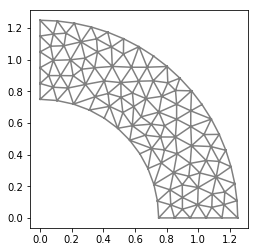

In [4]:
mesh = dolfin.Mesh(meshname + ".xml")
dolfin.plot(mesh)

## Boundary indicators

The following block load the function `boundaries` which maps the facets of the mesh to a set of indices that identify the (curvilinear) segment of the boundary to which it belongs

- `1`: bottom segment ($R-t/2\leq x\leq R+t/2$ and $y=0$),
- `2`: outer boundary ($r=R+t/2$),
- `3`: left segment ($x=0$ and $R-t/2\leq y\leq R+t/2$),
- `4`: inner boundary ($r=R-t/2$).

The function returns `0` if the current facet does not belong to any of the above segments. They are defined in the gmsh script.

In [5]:
boundaries = dolfin.MeshFunction("size_t", mesh, meshname + "_facet_region"+".xml")
domains = dolfin.MeshFunction("size_t", mesh, meshname + "_physical_region"+".xml")

We can also save the meshfunction to a file, this can be useful to check their values in ``paraview`` to impose BCs. In `*.pvd` format

In [6]:
dolfin.File(os.path.join(os.path.dirname(meshname), "boundaries.pvd")) << boundaries
dolfin.File(os.path.join(os.path.dirname(meshname), "domains.pvd")) << domains

or in `*.xdmf` format

In [7]:
with dolfin.XDMFFile(mesh.mpi_comm(), "output/boundaries.xdmf") as file: 
    file.write(boundaries)

## Strain-displacement operator

In 2D elasticity, the spatial coordinates are $x=$ `x[0]` and $y=$ `x[1]`.

Let us define below the function defining the strain

In [8]:
def eps(u):
    return #student_code

## Stress-strain operator

The stress-strain operator defined below corresponds to plane strain elasticity.
We will assume in the following, without loosing the generality,  that $E=1$. Why?
We then consider for the moment the case set $\nu=0.3$

In [9]:
mu = #
lmbda = #

SyntaxError: invalid syntax (<ipython-input-9-26de88242877>, line 1)

In [ ]:
def sig(epsilon):
    return #student_code 

## Variational formulation

We will denote by p_out and p_in the external and internal pressure. 

In [ ]:
element = # define the element 
V = # define the function space
u_ = # define the trial function
v = # define the test function

In [ ]:
a = # Define the bilinear form for the problem

We can define the linear form, corresponding to the work of the external forces, as follows. 
Note that we use the meshfunction `boundaries` to tag the boundaries and accordingly decompose
the surface measure. The same can be done for the volume measure using `domains`, but it is not required here because the solid is homogenous.

In [ ]:
p_out = dolfin.Constant(0.)
p_in = dolfin.Constant(1.)
ds = dolfin.Measure("ds", subdomain_data=boundaries)
n = dolfin.FacetNormal(mesh)
L = dolfin.inner(-p_in*n, v)*ds(4)+dolfin.inner(-p_out*n, v)*ds(2)

## Boundary conditions

Both $xx$ and $yy$ axes are axes of symmetry. We use the boundary indicators defined in the MeshFunction `boundaries` to specify where to apply the BCs 

In [ ]:
bcs = [dolfin.DirichletBC(V.sub(0), 0., boundaries, 3),
       dolfin.DirichletBC(V.sub(1), 0., boundaries, 1)]

# Solve the linear system

Write below the code to solve the linear system and store the solution in the variable (dolfin.Function) `u`

In [ ]:
u = Function(V)
# implement your solver

In [ ]:
# This I will remove before posting (but useful for us tomorrow. We can give after 1hour maybe? I will put in a gist)
def eps(u):
    return dolfin.sym(dolfin.grad(u))
E, nu = dolfin.Constant(1), dolfin.Constant(0.3)
mu, lmbda = E/(2*(1.0 + nu)), E*nu/((1.0 + nu)*(1.0 -2.0*nu))
I2 = dolfin.Identity(2)
def sig(epsilon):
    return  2.*mu*epsilon+lmbda*dolfin.tr(epsilon)*I2
p_out = dolfin.Constant(0.)
p_in = dolfin.Constant(1.)
element = dolfin.VectorElement('P', dolfin.triangle, degree=1, dim=2)
V = dolfin.FunctionSpace(mesh, element)
u = dolfin.TrialFunction(V)
v = dolfin.TestFunction(V)
ds = dolfin.Measure("ds", subdomain_data=boundaries)
n = dolfin.FacetNormal(mesh)

a = dolfin.inner(sig(eps(u)), eps(v))*dolfin.dx 
L = dolfin.inner(-p_in*n, v)*ds(4)+dolfin.inner(-p_out*n, v)*ds(2)
bcs = [dolfin.DirichletBC(V.sub(0), 0., boundaries, 3),
       dolfin.DirichletBC(V.sub(1), 0., boundaries, 1)]
u = dolfin.Function(V)
problem = dolfin.LinearVariationalProblem(a, L, u, bcs)
solver = dolfin.LinearVariationalSolver(problem)
solver.solve()

# Post-processing

We can check (visually) that the displacement is radial.

In [ ]:
dolfin.plot(mesh)
dolfin.plot(0.1*u, mode = "displacement")

## Comparison with the exact solution

We compare the finite element solution obtained above with the reference solution. We first compute the integration constants $A$ and $B$.

In [ ]:
p = (float(p_in)+float(p_out))/2.
varpi = (float(p_in)-float(p_out))/p
rho = thickness
A = p*(1-2*float(nu))*(varpi/2./rho*(1+(rho/2)**2)-1)/2./float(mu)
B = p*varpi*radius**2*((rho/2)**2-1)**2/8./(rho/2)/float(mu)
print(A,B)

We can also represent the exact solution as an expression, to interpolate on the FE mesh. We first define polar coordinates, and then compose the final expression. We need to specify the interpolation degree, which should be high.

In [ ]:
degree = 4
r_ = dolfin.Expression("sqrt(pow(x[0], 2)+pow(x[1], 2))",degree=degree)
theta_ = dolfin.Expression("atan2(x[1], x[0])",degree=degree)
u_r_ref = dolfin.Expression("A*r+B/r",r=r_,A=A,B=B,degree=degree)
u_ref = dolfin.Expression(("u*cos(theta)","u*sin(theta)"),
                          u=u_r_ref,theta=theta_,degree=degree)

In [ ]:
u_ref(2,1)

We can also interpolate this expression on a high finite element function space on a fine mesh and plot it 

In [ ]:
refined_mesh = dolfin.refine(dolfin.refine(mesh))
Vref = dolfin.VectorFunctionSpace(refined_mesh,'P',4)
u_ref_num = dolfin.interpolate(u_ref,Vref)
dolfin.plot(.1*u_ref_num, mode="displacement")

This calculate the L2 norm of the error w.r.t the FE solution. We refer to section 5.5 of the FEniCS tutorial for further details on computing the norm of the error. 

In [ ]:
error_L2 = dolfin.errornorm(u_ref,u,'L2')
u_norm = np.sqrt(dolfin.assemble(dolfin.inner(u,u)*dolfin.dx))
print("The L2 % error is ", error_L2/u_norm*100)

In [ ]:
error_H1 = dolfin.errornorm(u_ref,u,'H1')
u_norm = np.sqrt(dolfin.assemble(dolfin.inner(u,u)*dolfin.dx))
print("The H1 % error is ", error_H1/u_norm*100)

We can also make the plot of the solution as a function of the radius r using numpy and function evaluation

In [ ]:
atol = 1E-3
r = np.linspace(radius-0.5*(1-atol)*thickness,
                radius+0.5*(1-atol)*thickness, num=100)
theta = np.pi/3.
xy = r[..., None]*[np.cos(theta), np.sin(theta)]
u_r_ref = A*r+B/r

In [ ]:
u.set_allow_extrapolation(True)
u_r_fem = np.empty_like(xy[..., 0])
for k in range(xy.shape[0]):
    u_r_fem[k] = np.linalg.norm(u(xy[k]))

In [ ]:
plt.plot(r, u_r_ref, label='Exact')
plt.plot(r, u_r_fem, '+', label='FEM')
plt.xlabel('$r$')
plt.ylabel('$u_r$')
plt.legend();

There is an excellent agreement between the exact and numerical solutions. In order to get more quantitative results (in particular, in order to estimate the convergence rate), we first need to factor the above code into a single class, that can be called with various values of, e.g., the mesh refinement. This will be done in the next notebook.